## <span style="color:blue"> Linear Regression using Gradient Descent

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
X = [3,4,6,12,9,15,10,1,8,13] ## Experience
y = [16,29,43,65,51,89,57,9,53,68]  ## Salary

In [3]:
#X = [3,4,6]
#y = [16,29,43]

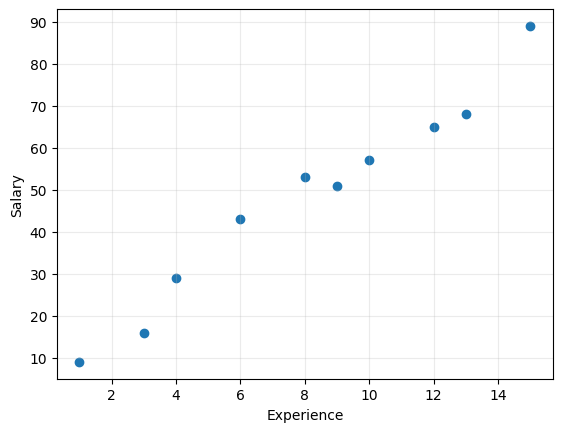

In [4]:
plt.scatter(X,y)
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.grid(alpha=0.25)
plt.show()

In [5]:
# Lets lienar regession line is y = mx + c
# lets 
# y = mx +c
c=0
# # y_pred = mx
# calcaulating the y_out we will mutiply the original X values by the slope to produce y_out values for each X
def multiply_matrix(x,m,c):
    y_out = []
    for i in range(len(x)):
        y_out.append(x[i]*m + c)
    return y_out

In [6]:
# Lets 
c = 0
m = 1
y_m1=multiply_matrix(X,m,c)
y_m1

[3, 4, 6, 12, 9, 15, 10, 1, 8, 13]

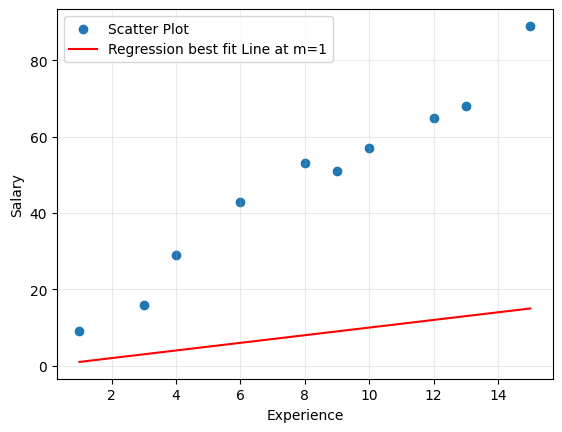

In [7]:
# line at m =1
plt.scatter(X, y,label='Scatter Plot') 
plt.plot([min(X), max(X)], [min(y_m1), max(y_m1)], color='red',label='Regression best fit Line at m=1')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.grid(alpha=0.25)
plt.legend()
plt.show()

In [8]:
# calculate cost function 1/n*sum(y-y_out)^2 by looping each sample
# calculate mse 1/n*sum(y-y_out)^2 by looping each sample
def mse(actual, predicted):
    sum_error = 0.0
    # loop over all values
    for i in range(len(actual)):
        # the error is the sum of (actual - prediction)^2
        SSE =  (actual[i] - predicted[i])**2
        sum_error =  sum_error + SSE
    mean_error = sum_error / float(len(actual))
    return (mean_error)

In [9]:
mse_m1 = mse(y,y_m1)
mse_m1

1953.5

mse for m : 0 and c : 0  is  2845.6


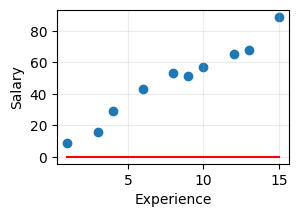

mse for m : 1 and c : 0  is  1953.5


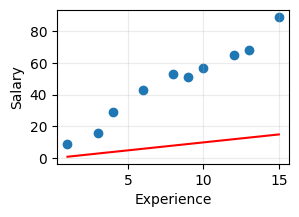

mse for m : 2 and c : 0  is  1230.4


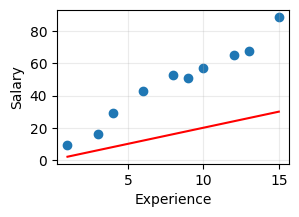

mse for m : 3 and c : 0  is  676.3


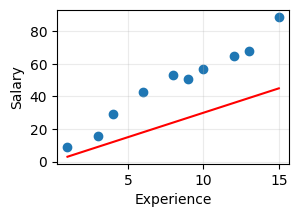

mse for m : 4 and c : 0  is  291.2


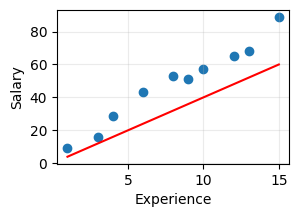

mse for m : 5 and c : 0  is  75.1


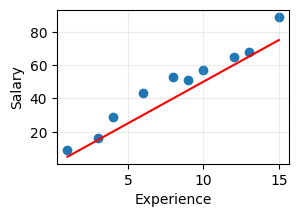

mse for m : 6 and c : 0  is  28.0


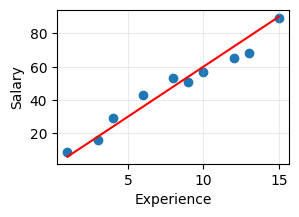

mse for m : 7 and c : 0  is  149.9


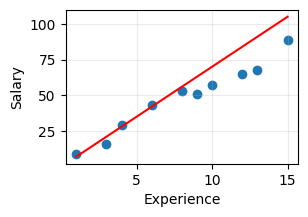

mse for m : 8 and c : 0  is  440.8


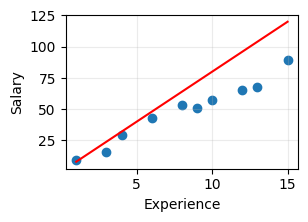

In [10]:
# calculate mse for different m values ,lets take m = range(0,9)
mse_values = []  # store the MSE for each m where m = range(0,9)
m = range(0,9)
c = 0
for i in m: 
    y_out_values = multiply_matrix(X, m[i],c)
    mse_values.append(mse(y, y_out_values))
    print("mse for m :",m[i], "and c :",c ," is ", mse(y, y_out_values))
    plt.figure(figsize=(3,2))
    plt.scatter(X, y,label='Scatter Plot') 
    plt.plot([min(X), max(X)], [min(y_out_values), max(y_out_values)], color='red',label='regression line')
    plt.xlabel('Experience')
    plt.ylabel('Salary')
    plt.grid(alpha=0.25)
    #plt.legend()
    plt.show()

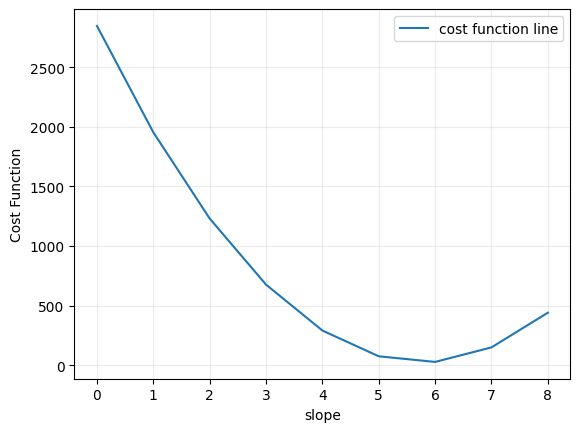

In [11]:
plt.plot(m,mse_values,label = "cost function line")
plt.xlabel('slope')
plt.ylabel('Cost Function')
plt.grid(alpha=0.25)
plt.legend()

In [12]:
np.min(mse_values)  # at this MSE we get the best bit line when m = 5 and c =0
# but we have to iterate the both m & c to get the best bit line taht we can get with the help 
# of gradient descent(taking derivative of MSE wrt m and c)

28.0

<b>Cost Function</b>

\begin{equation}
Linear Equation ==> y = mx + c
\end{equation}

\begin{equation}
J(x) = 1/n \sum_{i=1}^{n} (y^{(i)} - y^{(i)}predicted)^2 
\end{equation}

\begin{equation}
y^{(i)}predicted = (mx^{(i)} + c)
\end{equation}

\begin{equation}
J(x) = 1/n \sum_{i=1}^{n} (y^{(i)} - (mx^{(i)} + c))^2 
\end{equation}

<b>Gradient</b>

**Derivative of cost function with respect to   m   ==>  slope**
\begin{equation}
\frac{\partial J(x^{(i)})}{\partial m} = -2/n\sum_{i=1}^{n}(x^{(i)}).(y^{(i)} - (mx^{(i)} + c))
\end{equation}

**Derivative of cost function with respect to   c   ==>  intercept**
\begin{equation}
\frac{\partial J(x^{(i)})}{\partial c} = -2/n\sum_{i=1}^{n}(y^{(i)} - (mx^{(i)} + c))
\end{equation}

**Why do we take derivative?**

To get the direction of where is global minimum. If we are on left side of minimum value of parabola then the derivate is negative and negative sign before derivate will make the new value of X go right and thus more closer to minimum value. Vice versa for right side.

In [13]:
import numpy as np
def Simple_LinearRegression_Gradient_Descent(x,y,epochs,learning_rate,n):
    m_curr = c_curr = 0
    for i in range(epochs):
        y_pred = m_curr * x + c_curr
        ## MSE equation == cost_function
        cost = (1/n) * sum([val**2 for val in (y-y_pred)])
        md = -(2/n)*sum(x*(y-y_pred))
        cd = -(2/n)*sum(y-y_pred)
        m_curr = m_curr - learning_rate * md  # step_size = learning_rate * md 
        c_curr = c_curr - learning_rate * cd  # # step_size = learning_rate * cd 
        print('>epoch=%d, m=%.3f,c=%.3f, md=%.3f,cd=%.3f,step_size_m=%.3f,step_size_c=%.3f,cost=%.3f' % 
              (i,m_curr,c_curr, md,cd,md*learning_rate,cd*learning_rate,(cost)))

In [14]:
x = np.array([3,4,6,12,9,15,10,1,8,13])
y = np.array([16,29,43,65,51,89,57,9,53,68])
epochs = 30
n = len(x)
learning_rate = 0.001
Simple_LinearRegression_Gradient_Descent(x,y,epochs,learning_rate,n)

>epoch=0, m=0.977,c=0.096, md=-976.600,cd=-96.000,step_size_m=-0.977,step_size_c=-0.096,cost=2845.600
>epoch=1, m=1.787,c=0.176, md=-809.999,cd=-79.987,step_size_m=-0.810,step_size_c=-0.080,cost=1964.756
>epoch=2, m=2.458,c=0.243, md=-671.814,cd=-66.705,step_size_m=-0.672,step_size_c=-0.067,cost=1358.756
>epoch=3, m=3.016,c=0.298, md=-557.197,cd=-55.688,step_size_m=-0.557,step_size_c=-0.056,cost=941.840
>epoch=4, m=3.478,c=0.345, md=-462.128,cd=-46.550,step_size_m=-0.462,step_size_c=-0.047,cost=655.012
>epoch=5, m=3.861,c=0.384, md=-383.274,cd=-38.971,step_size_m=-0.383,step_size_c=-0.039,cost=457.679
>epoch=6, m=4.179,c=0.417, md=-317.870,cd=-32.684,step_size_m=-0.318,step_size_c=-0.033,cost=321.917
>epoch=7, m=4.443,c=0.444, md=-263.620,cd=-27.469,step_size_m=-0.264,step_size_c=-0.027,cost=228.515
>epoch=8, m=4.661,c=0.467, md=-218.623,cd=-23.143,step_size_m=-0.219,step_size_c=-0.023,cost=164.256
>epoch=9, m=4.842,c=0.487, md=-181.301,cd=-19.555,step_size_m=-0.181,step_size_c=-0.020,

In [15]:
## Plot the cost with each iteration
import matplotlib.pyplot as plt
def Simple_LinearRegression_Gradient_Descent_cost_plot(x,y,epochs,learning_rate,n):
    m_curr = 0
    c_curr = 0
    iter = epochs
    cost_val = [] # list to store the cost in each iteration
    intercept = []
    coefficient = []
    for i in range(iter):
        y_pred = (m_curr * x) + c_curr
        cost = 1/n * sum([data**2 for data in (y - y_pred)])
        cost_val.append(cost) ## append the cost_val 
        md = -(2/n) * sum(x * (y - y_pred))
        cd = -(2/n) * sum(y - y_pred)
        m_curr = m_curr - (learning_rate * md)  # 
        coefficient.append(m_curr)
        c_curr = c_curr - (learning_rate * cd)
        intercept.append(c_curr)
    return intercept,coefficient,cost_val

C:\Users\HP\AppData\Local\Temp\ipykernel_5136\479351051.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(coefficient, cost_val, '.r',color='blue',label="cost function curve")


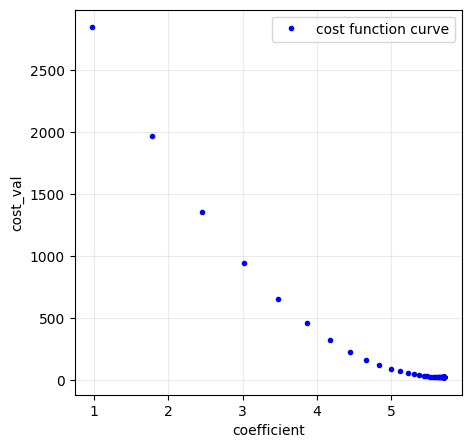

In [16]:
x = np.array([3,4,6,12,9,15,10,1,8,13])
y = np.array([16,29,43,65,51,89,57,9,53,68])
epochs = 100
n = len(x)
learning_rate = 0.001
intercept,coefficient,cost_val = Simple_LinearRegression_Gradient_Descent_cost_plot(x,y,epochs,learning_rate,n)

plt.figure(figsize=(5,5))
plt.plot(coefficient, cost_val, '.r',color='blue',label="cost function curve")
plt.xlabel('coefficient')
plt.ylabel('cost_val')
plt.grid(alpha=0.25)
plt.legend()

In [17]:
## Now plot grapg to show the regression best fit line 
import matplotlib.pyplot as plt
%matplotlib inline

def Simple_LinearRegression_Gradient_Descent_best_fit_line(x,y,epochs,learning_rate,n):
    m_curr = 0
    c_curr = 0
    iter = epochs
    plt.scatter(x,y,color = "red",label='Scatter Plot')
    for i in range(iter):
        ## y = mx + c
        y_pred = m_curr * x + c_curr
        ## MSE equation == cost_function
        cost = 1/n*sum([val**2 for val in (y - y_pred)])
        ## lets take derivative
        md = -2/n * sum(x*(y - y_pred))
        cd = -2/n * sum(y - y_pred)
        plt.plot(x,y_pred,color = "blue",linewidth='.1') 
        plt.xlabel('Experience')
        plt.ylabel('Salary')
        #plt.style.use('fivethirtyeight')
        #plt.legend()
        m_curr = m_curr - learning_rate * md
        c_curr = c_curr - learning_rate * cd      

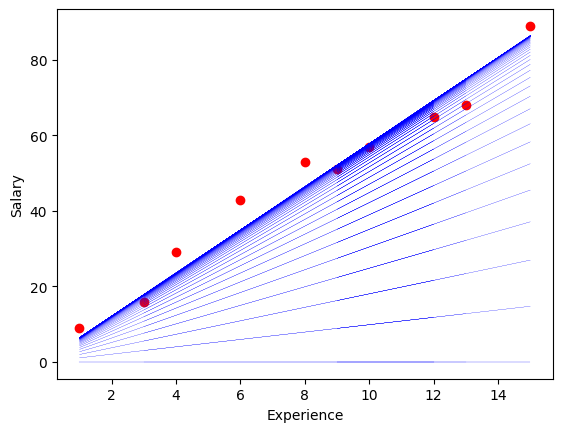

In [18]:
#x = np.array([3,4,6,12,9,15,10,1,8,13])
#y = np.array([16,29,43,65,51,89,57,9,53,68])
epochs = 100
n = len(x)
learning_rate = 0.001
Simple_LinearRegression_Gradient_Descent_best_fit_line(x,y,epochs,learning_rate,n)

In [19]:
lr = LinearRegression()
lr.fit(x.reshape(-1,1),y)

LinearRegression()

In [20]:
lr.intercept_,lr.coef_

(5.33456855479087, array([5.26733722]))

In [21]:
y_predict = lr.predict(x.reshape(-1,1))
y_predict

array([21.1365802 , 26.40391742, 36.93859185, 68.54261514, 52.74060349,
       84.34462679, 58.00794071, 10.60190577, 47.47326628, 73.80995236])

In [22]:
mean_squared_error(y,y_predict)

17.499947061937537

In [23]:
from sklearn.linear_model import ElasticNet,Ridge,Lasso

In [24]:
lre = ElasticNet()
lre.fit(x.reshape(-1,1),y)

ElasticNet()

In [25]:
lre.intercept_,lre.coef_

(6.643630737493552, array([5.1057246]))

In [26]:
y_predict_e = lre.predict(x.reshape(-1,1))
y_predict_e

array([21.96080454, 27.06652914, 37.27797834, 67.91232594, 52.59515214,
       83.22949974, 57.70087674, 11.74935534, 47.48942754, 73.01805054])

In [27]:
mean_squared_error(y,y_predict_e)

17.993328121953727